In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,GRU
from keras.optimizers import Adam, RMSprop
from keras.losses import binary_crossentropy
from keras.metrics import accuracy

import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [2]:
feature =pd.read_csv('final2.csv')

In [3]:
f = pd.read_csv('2019빅데이터페스티벌데이터/KOSPI_국면분석.csv', encoding = 'cp949')

In [4]:
feature

,날짜,지수종가,종가이동평균_5,거래량,거래량이동평균_5,자본금,전체종목수,상승종목수,하락종목수,보합종목수,...,자동차판매[AutoSales][미국],자본금융수지[브라질],자본수지,장단기금리차(%p)(선행),재고순환지표(%p)(선행),재고지수[미국],재정수지[미국],제조업평균가동률지수(계절조정),제조업평균가동률지수(원지수),직접투자[브라질]
0,2001-01-08,586.65,553.580,558645100,19.873264,84853590,902,533,278,45,...,8708.40,5.404533,-10.965500,1.35,-10.8,41.6,76379.0,95.1,86.9,-1568.746882
1,2001-01-09,589.92,567.374,558967700,20.016030,84881174,902,527,282,49,...,8708.40,5.404533,-10.965500,1.35,-10.8,41.6,76379.0,95.1,86.9,-1568.746882
2,2001-01-10,560.81,575.250,642378200,20.137292,84891369,902,137,698,23,...,8708.40,5.404533,-10.965500,1.35,-10.8,41.6,76379.0,95.1,86.9,-1568.746882
3,2001-01-11,561.79,576.004,518788600,20.163623,84906240,902,574,242,43,...,8708.40,5.404533,-10.965500,1.35,-10.8,41.6,76379.0,95.1,86.9,-1568.746882
4,2001-01-12,587.87,577.408,713787700,20.209960,84909240,902,494,298,68,...,8708.40,5.404533,-10.965500,1.35,-10.8,41.6,76379.0,95.1,86.9,-1568.746882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,2018-12-21,2061.49,2066.730,311388800,19.819547,107914395,900,381,445,70,...,5188.39,14.856753,-13.080523,0.59,-5.6,52.9,-204903.0,97.7,101.8,-8323.777291
4441,2018-12-24,2055.01,2063.514,285275000,19.737655,107972455,900,285,538,71,...,5188.39,14.856753,-13.080523,0.59,-5.6,52.9,-204903.0,97.7,101.8,-8323.777291
4442,2018-12-26,2028.01,2056.694,321499300,19.678019,108073277,900,128,724,44,...,5188.39,14.856753,-13.080523,0.59,-5.6,52.9,-204903.0,97.7,101.8,-8323.777291
4443,2018-12-27,2028.44,2046.614,398021300,19.666131,108148532,901,521,331,45,...,5188.39,14.856753,-13.080523,0.59,-5.6,52.9,-204903.0,97.7,101.8,-8323.777291


In [5]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4445 entries, 0 to 4444
Columns: 132 entries, 날짜 to 직접투자[브라질]
dtypes: float64(119), int64(12), object(1)
memory usage: 4.5+ MB


In [6]:
f = f.loc[4:,:].reset_index()

In [7]:
f['Y']

0       상승
1       상승
2       상승
3       상승
4       상승
        ..
4440    하락
4441    하락
4442    하락
4443    상승
4444    하락
Name: Y, Length: 4445, dtype: object

In [8]:
feature['Y']=pd.Series(f['Y'])

In [9]:
feature.drop(['변동률'], axis=1, inplace=True)

In [10]:
feature[feature['날짜']=='2017-01-02']

,날짜,지수종가,종가이동평균_5,거래량,거래량이동평균_5,자본금,전체종목수,상승종목수,하락종목수,보합종목수,...,자본금융수지[브라질],자본수지,장단기금리차(%p)(선행),재고순환지표(%p)(선행),재고지수[미국],재정수지[미국],제조업평균가동률지수(계절조정),제조업평균가동률지수(원지수),직접투자[브라질],Y
3958,2017-01-02,2026.16,2031.406,229874900,19.584866,103560743,894,355,449,72,...,31.564794,1.526805,0.436341,8.660976,48.731707,-35822.317073,91.836585,89.22439,-9068.664637,상승


In [11]:
train = feature.iloc[:3958,:]
test = feature.iloc[3958:,:]

In [12]:
train.head()

,날짜,지수종가,종가이동평균_5,거래량,거래량이동평균_5,자본금,전체종목수,상승종목수,하락종목수,보합종목수,...,자본금융수지[브라질],자본수지,장단기금리차(%p)(선행),재고순환지표(%p)(선행),재고지수[미국],재정수지[미국],제조업평균가동률지수(계절조정),제조업평균가동률지수(원지수),직접투자[브라질],Y
0,2001-01-08,586.65,553.580,558645100,19.873264,84853590,902,533,278,45,...,5.404533,-10.9655,1.35,-10.8,41.6,76379.0,95.1,86.9,-1568.746882,상승
1,2001-01-09,589.92,567.374,558967700,20.016030,84881174,902,527,282,49,...,5.404533,-10.9655,1.35,-10.8,41.6,76379.0,95.1,86.9,-1568.746882,상승
2,2001-01-10,560.81,575.250,642378200,20.137292,84891369,902,137,698,23,...,5.404533,-10.9655,1.35,-10.8,41.6,76379.0,95.1,86.9,-1568.746882,상승
3,2001-01-11,561.79,576.004,518788600,20.163623,84906240,902,574,242,43,...,5.404533,-10.9655,1.35,-10.8,41.6,76379.0,95.1,86.9,-1568.746882,상승
4,2001-01-12,587.87,577.408,713787700,20.209960,84909240,902,494,298,68,...,5.404533,-10.9655,1.35,-10.8,41.6,76379.0,95.1,86.9,-1568.746882,상승


In [65]:
train.describe()

,지수종가,종가이동평균_5,거래량,거래량이동평균_5,자본금,전체종목수,상승종목수,하락종목수,보합종목수,상한종목수,...,자동차판매[AutoSales][미국],자본금융수지[브라질],자본수지,장단기금리차(%p)(선행),재고순환지표(%p)(선행),재고지수[미국],재정수지[미국],제조업평균가동률지수(계절조정),제조업평균가동률지수(원지수),직접투자[브라질]
count,3958.000000,3958.000000,3.958000e+03,3958.000000,3.958000e+03,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,...,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,1473.836481,1473.091653,4.283546e+08,19.807488,9.220650e+07,893.900202,383.147802,405.972713,70.682415,10.543709,...,7178.527971,15.104615,-32.142729,0.702974,-1.086220,46.880592,-53166.057183,96.545499,96.931874,-3162.453425
std,526.309530,526.296487,1.952114e+08,0.355367,8.781071e+06,30.144868,128.683690,132.724818,17.323366,11.150678,...,888.362958,27.623966,54.580989,0.638570,7.400974,4.915713,68869.121097,3.596836,5.017107,2990.285715
min,468.760000,474.372000,1.363290e+08,18.900436,7.858320e+07,832.000000,15.000000,46.000000,2.000000,0.000000,...,4644.000000,-300.885592,-177.379000,-0.130000,-14.100000,31.000000,-231677.000000,86.900000,81.300000,-11688.955620
25%,919.077500,917.589500,3.082319e+08,19.576608,8.372517e+07,863.000000,301.000000,315.000000,60.000000,4.000000,...,6843.636000,7.191500,-66.949756,0.209171,-5.752329,43.680122,-95359.685417,93.542745,93.779268,-5401.552479
50%,1645.185000,1647.056000,3.859440e+08,19.776404,9.230305e+07,896.000000,384.000000,394.000000,72.000000,8.000000,...,7461.872503,13.561774,-27.625192,0.522754,-3.227386,47.571853,-59677.832981,97.192868,96.900000,-2591.954064
75%,1957.247500,1956.234000,4.946896e+08,20.012928,9.960981e+07,921.000000,467.000000,487.000000,83.000000,14.000000,...,7629.135000,24.765664,-0.519871,1.002176,3.174562,50.543975,-11976.750642,99.495179,100.956960,-920.639641
max,2228.960000,2208.534000,2.379294e+09,21.391700,1.106207e+08,939.000000,840.000000,844.000000,122.000000,376.000000,...,10380.000000,112.607960,176.861500,2.400000,23.200000,56.500000,189796.000000,102.700000,108.300000,13300.163290


In [13]:
selector = VarianceThreshold(threshold=0.1)
selector.fit(train.drop(['날짜','Y'], axis=1))

f = np.vectorize(lambda x:not x) # boolean 배열 요소를 전환하는 함수=> false to true

v = train.drop(['날짜','Y'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

8 variables have too low variance.
These variables are ['COMP', 'NEG', 'NEUT', 'None', 'POS', '경기동행지수전월비(%)[미국]', '도매재고율[미국]', '동행지수 순환변동치 전월차(p)']


In [14]:
train.isnull().sum()

날짜                  0
지수종가                0
종가이동평균_5            0
거래량                 0
거래량이동평균_5           0
                   ..
재정수지[미국]            0
제조업평균가동률지수(계절조정)    0
제조업평균가동률지수(원지수)     0
직접투자[브라질]           0
Y                   0
Length: 132, dtype: int64

In [34]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.drop(['날짜','Y'], axis=1))
train_scaled = pd.DataFrame(data = train_scaled, columns = train.drop(['날짜','Y'], axis=1).columns)
train_scaled = pd.concat([train_scaled, train[['날짜','Y']]], axis=1)
train_scaled.describe()

,지수종가,종가이동평균_5,거래량,거래량이동평균_5,자본금,전체종목수,상승종목수,하락종목수,보합종목수,상한종목수,...,자동차판매[AutoSales][미국],자본금융수지[브라질],자본수지,장단기금리차(%p)(선행),재고순환지표(%p)(선행),재고지수[미국],재정수지[미국],제조업평균가동률지수(계절조정),제조업평균가동률지수(원지수),직접투자[브라질]
count,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,...,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,0.571001,0.575909,0.130196,0.364093,0.425230,0.578507,0.446240,0.451094,0.572353,0.028042,...,0.441863,0.764196,0.409993,0.329239,0.348895,0.622768,0.423541,0.610475,0.578958,0.341209
std,0.299006,0.303487,0.087033,0.142645,0.274087,0.281728,0.155980,0.166322,0.144361,0.029656,...,0.154875,0.066806,0.154079,0.252399,0.198418,0.192773,0.163401,0.227648,0.185819,0.119664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255833,0.255580,0.076641,0.271417,0.160498,0.289720,0.346667,0.337093,0.483333,0.010638,...,0.383479,0.745059,0.311735,0.134060,0.223798,0.497260,0.323431,0.420427,0.462195,0.251606
50%,0.668347,0.676225,0.111288,0.351616,0.428243,0.598131,0.447273,0.436090,0.583333,0.021277,...,0.491261,0.760465,0.422746,0.258005,0.291491,0.649877,0.408091,0.651447,0.577778,0.364039
75%,0.845635,0.854512,0.159771,0.446557,0.656312,0.831776,0.547879,0.552632,0.675000,0.037234,...,0.520421,0.787561,0.499263,0.447500,0.463125,0.766430,0.521268,0.797163,0.728036,0.430920
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
t_d = pd.DataFrame(train_scaled.describe())

In [30]:
t_d.loc[:,t_d.loc['std',] < 0.1]

,거래량,상한종목수,하한종목수,연중최고가종목수,연중최저가종목수,52주신저가종목수,snp500,nasdaq,shanghai,COMP,NEG,NEUT,None,POS,기본 금융 금리,도시가계소비지출(실질)(천원)(후행),무역수지[베트남],무역수지[태국],실업률[한국_SA],자본금융수지[브라질]
count,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,0.130196,0.028042,0.005843,0.011593,0.012437,0.024077,0.404758,0.437584,0.473665,0.114779,0.473313,0.148222,0.041490,0.498345,0.008137,0.898725,0.271099,0.379461,0.016463,0.764196
std,0.087033,0.029656,0.023583,0.044185,0.060155,0.054914,0.050107,0.069567,0.086167,0.046440,0.056914,0.045156,0.025812,0.047755,0.072995,0.072317,0.085809,0.091336,0.070981,0.066806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076641,0.010638,0.000000,0.000000,0.000000,0.003891,0.384647,0.407160,0.436364,0.102314,0.455798,0.136032,0.038813,0.483570,0.000029,0.860028,0.242354,0.344762,0.004557,0.745059
50%,0.111288,0.021277,0.003221,0.000000,0.000000,0.009079,0.405378,0.438663,0.472727,0.118752,0.471228,0.144713,0.042720,0.498593,0.000045,0.920478,0.281320,0.381921,0.009131,0.760465
75%,0.159771,0.037234,0.006441,0.000000,0.000000,0.022049,0.426929,0.470167,0.513770,0.132290,0.488168,0.153744,0.046296,0.511839,0.000080,0.943380,0.307333,0.415869,0.012281,0.787561
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## imbalanced featrues
- 로그변환 필요
- 거래량, 상한종목수, 하한종목수, 52주신저가 종목수, 기본 금융 금리, 도시가계소비지출(실질)(천원)(후행), 실업률[한국_SA], 무역수지[베트남], 무역수자[태국]
- 드롭 : 연중최고가 종목수, 연중최저가 종목수
> 그러나 모든 피처의 분포를 비슷하게 만들 필요는 없음. 작은 단위의 변화가 큰 차이를 나타내는 것으로 반영될 수 있기 때문이다.

In [68]:
train_copy = train.copy()
log_trans_list = ['거래량', '상한종목수', '하한종목수', '52주신저가종목수', '기본 금융 금리', '도시가계소비지출(실질)(천원)(후행)', '실업률[한국_SA]'] 
for n in log_trans_list:
    train_copy[n] = np.log1p(train[n])

In [69]:
train_copy[log_trans_list].describe()

,거래량,상한종목수,하한종목수,52주신저가종목수,기본 금융 금리,도시가계소비지출(실질)(천원)(후행),실업률[한국_SA]
count,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,19.798521,2.150392,1.022384,2.205909,2.741331,7.722096,1.530436
std,0.376175,0.796754,0.852165,1.158501,1.071015,0.045221,0.246223
min,18.730582,0.000000,0.000000,0.000000,2.028148,7.008221,1.386294
25%,19.546363,1.609438,0.000000,1.386294,2.419505,7.700814,1.449214
50%,19.771203,2.197225,1.098612,2.079442,2.587045,7.735336,1.508613
75%,20.019441,2.708050,1.609438,2.890372,2.871726,7.748110,1.547563
max,21.590070,5.932245,6.432940,6.648985,11.738562,7.779007,4.110874


C:\Users\dldud\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dldud\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dldud\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dldud\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dldud\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dldud\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50724 missing from c

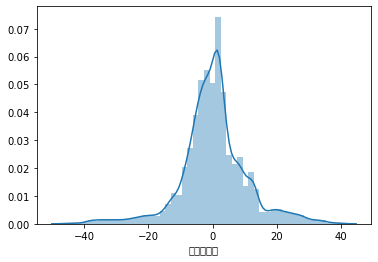

In [72]:
sns.distplot(train['오차및증감'])

In [70]:
#스케일링 
scaler = RobustScaler()
train_scaled = scaler.fit_transform(train_copy.drop(['날짜','Y','COMP', 'NEG', 'NEUT', 'None', 'POS','snp500','nasdaq','shanghai']+log_trans_list, axis=1))
train_scaled = pd.DataFrame(data = train_scaled, columns = train_copy.drop(['날짜','Y','COMP', 'NEG', 'NEUT', 'None', 'POS','snp500','nasdaq','shanghai']+log_trans_list, axis=1).columns)
train_scaled = pd.concat([train_scaled, train_copy[['날짜','Y','COMP', 'NEG', 'NEUT', 'None', 'POS','snp500','nasdaq','shanghai']+log_trans_list]], axis=1)
train_scaled.describe()

,지수종가,종가이동평균_5,거래량이동평균_5,자본금,전체종목수,상승종목수,하락종목수,보합종목수,연중최고가종목수,연중최저가종목수,...,snp500,nasdaq,shanghai,거래량,상한종목수,하한종목수,52주신저가종목수,기본 금융 금리,도시가계소비지출(실질)(천원)(후행),실업률[한국_SA]
count,3.958000e+03,3.958000e+03,3.958000e+03,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,...,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,-1.650486e-01,-1.674917e-01,7.124058e-02,-0.006078,-0.036203,-0.005134,0.069609,-0.057286,11.176099,11.989641,...,0.019917,0.027390,0.017532,19.798521,2.150392,1.022384,2.205909,2.741331,7.722096,1.530436
std,5.069589e-01,5.067147e-01,8.144622e-01,0.552803,0.519739,0.775203,0.771656,0.753190,42.593951,57.989656,...,1.220617,1.457428,1.611318,0.376175,0.796754,0.852165,1.158501,1.071015,0.045221,0.246223
min,-1.133172e+00,-1.129052e+00,-2.007624e+00,-0.863718,-1.103448,-2.222892,-2.023256,-3.043478,0.000000,0.000000,...,-9.840000,-9.140000,-8.840000,18.730582,0.000000,0.000000,0.000000,2.028148,7.008221,1.386294
25%,-6.994110e-01,-7.023255e-01,-4.579112e-01,-0.540011,-0.568966,-0.500000,-0.459302,-0.521739,0.000000,0.000000,...,-0.470000,-0.610000,-0.680000,19.546363,1.609438,0.000000,1.386294,2.419505,7.700814,1.449214
50%,1.095044e-16,1.094570e-16,-4.071233e-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035000,0.050000,0.000000,19.771203,2.197225,1.098612,2.079442,2.587045,7.735336,1.508613
75%,3.005890e-01,2.976745e-01,5.420888e-01,0.459989,0.431034,0.500000,0.540698,0.478261,0.000000,0.000000,...,0.560000,0.710000,0.767500,20.019441,2.708050,1.609438,2.890372,2.871726,7.748110,1.547563
max,5.623116e-01,5.405873e-01,3.702087e+00,1.153170,0.741379,2.746988,2.616279,2.173913,964.000000,964.000000,...,14.520000,11.810000,9.860000,21.590070,5.932245,6.432940,6.648985,11.738562,7.779007,4.110874


In [71]:
X_train = train_scaled.drop(['날짜','Y'], axis=1)
y_train = train_scaled['Y']


feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)


rf.fit(X_train, y_train)
importances= rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1] # 처음부터 끝까지 -1칸 간격으로(역순)

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,30, feat_labels[indices[f]], importances[indices[f]]))

 1) snp500                         0.019991
 2) 지수종가                           0.017381
 3) 종가이동평균_5                       0.016940
 4) 제조업                            0.016619
 5) 코스피 200                        0.015955
 6) nasdaq                         0.015511
 7) 거래량이동평균_5                      0.012519
 8) 전기전자                           0.012023
 9) 서비스업                           0.011942
10) 운수장비                           0.010848
11) 공공행정활동지수                       0.009916
12) USD                            0.009772
13) 거래량                            0.009574
14) 금융수지                           0.009544
15) 52주신저가종목수                      0.009243
16) 실업률[오스트리아_NSA]                 0.009168
17) shanghai                       0.009168
18) 금융계정[브라질]                      0.009052
19) 상승종목수                          0.008969
20) NEUT                           0.008942
21) 자본금                            0.008852
22) 무역수지[아일랜드]                     0.008767
23) POS                         

In [73]:
a=0
for i in importances:
    a += i
print(a)

1.0


In [74]:
sfm = SelectFromModel(rf, threshold = 'median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 130
Number of features after selection: 65


In [59]:
# 23개
drop_list = ['실업률[스위스_NSA]', '소비자물가(SA)[일본]', '경상수지[일본]', '경상수지[일본](SA)', 'OECD 경기선행지수[중국]', '무역수지[일본](SA)', '소매물가지수(농촌)[중국]', '무역수지[베트남]', '소비자물가[인도]', '금융계정[브라질]', '직접투자[브라질]', '자본금융수지[브라질]', '산업생산 증가율[중국]', '도매매출[일본]', '무역수지[태국]', '실업률[핀란드_NSA]', '건축허가건수[미국]', '산업생산[핀란드]', '산업생산[네덜란드](SA)', '수출국(이탈리아)', '산업생산(EURO17개국)', '소비자물가상승율[브라질]', '산업생산[남아공]']

In [150]:
feature.오차및증감

0       8.840
1       8.840
2       8.840
3       8.840
4       8.840
        ...  
4440   -1.091
4441   -1.091
4442   -1.091
4443   -1.091
4444   -1.091
Name: 오차및증감, Length: 4445, dtype: float64

In [75]:
selected_vars

['지수종가',
 '종가이동평균_5',
 '거래량이동평균_5',
 '자본금',
 '상승종목수',
 '하락종목수',
 '보합종목수',
 '52주신고가종목수',
 '금괴(일간)',
 '원유 WTI',
 'USD',
 '코스피 200',
 '제조업',
 '전기전자',
 '운수장비',
 '서비스업',
 'ISM비제조업지수[미국]',
 '건설업생산지수',
 '경상수지',
 '경상수지[일본]',
 '경상수지[일본](SA)',
 '공공행정활동지수',
 '구인구직비율(%)(선행)',
 '금융계정[브라질]',
 '금융수지',
 '뉴욕제조업지수[미국]',
 '도매매출[일본]',
 '동행지수 순환변동치 전월차(p)',
 '무역수지[룩셈부르크]',
 '무역수지[베트남]',
 '무역수지[아일랜드]',
 '무역수지[태국]',
 '무역수지[포르투갈]',
 '본원소득지급[브라질]',
 '산업생산 증가율[중국]',
 '산업생산[그리스]',
 '산업생산[네덜란드](SA)',
 '산업생산[룩셈부르크]',
 '상품가격지수[미국]',
 '선행지수 순환변동치 전월차(p)',
 '소득수지',
 '수출국(멕시코)',
 '수출국(미국)',
 '수출국(이탈리아)',
 '수출국(칠레)',
 '실업률[스위스_NSA]',
 '실업률[오스트리아_NSA]',
 '실업률[핀란드_NSA]',
 '오차및증감',
 '이전소득수지',
 '자동차판매[AutoSales][미국]',
 '자본금융수지[브라질]',
 '자본수지',
 '재정수지[미국]',
 '직접투자[브라질]',
 'COMP',
 'NEG',
 'NEUT',
 'None',
 'POS',
 'snp500',
 'nasdaq',
 'shanghai',
 '거래량',
 '52주신저가종목수']

# 신경망 구축

In [104]:
feature_m = feature[selected_vars + ['날짜'] + ['Y']]

In [111]:
log_trans_list = ['거래량', '52주신저가종목수'] 
for n in log_trans_list:
    feature_m[n] = np.log1p(feature_m[n])

In [112]:
#스케일링 
scaler = RobustScaler()
feam_scaled = scaler.fit_transform(feature_m.drop(['날짜','Y','COMP', 'NEG', 'NEUT', 'None', 'POS','snp500','nasdaq','shanghai']+log_trans_list, axis=1))
feam_scaled = pd.DataFrame(data = feam_scaled, columns = feature_m.drop(['날짜','Y','COMP', 'NEG', 'NEUT', 'None', 'POS','snp500','nasdaq','shanghai']+log_trans_list, axis=1).columns)
feam_scaled = pd.concat([feam_scaled, feature_m[['날짜','Y','COMP', 'NEG', 'NEUT', 'None', 'POS','snp500','nasdaq','shanghai']+log_trans_list]], axis=1)
feam_scaled.describe()

,지수종가,종가이동평균_5,거래량이동평균_5,자본금,상승종목수,하락종목수,보합종목수,52주신고가종목수,금괴(일간),원유 WTI,...,COMP,NEG,NEUT,None,POS,snp500,nasdaq,shanghai,거래량,52주신저가종목수
count,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,...,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000
mean,-0.204420,-0.201017,0.079099,-0.246400,-0.007099,0.069964,-0.063736,0.310963,-0.154900,0.062141,...,0.019328,0.377203,0.062947,0.041461,0.499060,0.020333,0.028823,0.011417,0.487165,0.539435
std,0.576143,0.572851,0.814847,0.562396,0.772788,0.769342,0.746393,1.070629,0.532470,0.618378,...,0.007372,0.043241,0.018128,0.024389,0.045411,1.183392,1.416666,1.552455,0.000599,0.156302
min,-1.324223,-1.307915,-2.024052,-1.163211,-2.215569,-2.023121,-3.043478,-0.692308,-0.970522,-1.216783,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.840000,-9.140000,-8.840000,0.485383,0.000000
25%,-0.765069,-0.764544,-0.456384,-0.826708,-0.502994,-0.456647,-0.521739,-0.384615,-0.752930,-0.407925,...,0.017433,0.363337,0.058086,0.038783,0.485093,-0.430000,-0.560000,-0.650000,0.486764,0.514321
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019940,0.375458,0.061697,0.042522,0.499511,0.040000,0.050000,0.000000,0.487129,0.580005
75%,0.234931,0.235456,0.543616,0.173292,0.497006,0.543353,0.478261,0.615385,0.247070,0.592075,...,0.022094,0.388546,0.065362,0.045991,0.512412,0.540000,0.690000,0.710000,0.487524,0.633188
max,0.848310,0.822861,3.831275,0.792318,3.413174,2.710983,2.173913,10.423077,0.973718,1.960373,...,0.166667,0.798948,0.424242,1.000000,1.000000,14.520000,11.810000,9.860000,0.489947,0.746721


In [173]:
def generator(data, lookback=10, delay=5, min_index=0, max_index=None):
    data = data.values #DataFrame을 넘파이로 바꾸기
    max_index = len(data) - delay -1 #4439
    i = min_index + lookback #index1부터 
    samples = np.zeros((len(range(max_index-i+1)), lookback, data.shape[-1])) #(4445, 1, 65)
    targets = np.zeros((len(range(max_index-i+1)),)) #(4430,)
    while i <= max_index:
        indices = range(i-lookback, i)
        samples[i-lookback] = data[indices]
        if data[i+delay][0] - data[i][0] >= 0:
            targets[i-lookback] = 1
        else:
            targets[i-lookback] = 0
        i += 1
    return samples, targets

In [174]:
samples, targets = generator(feam_scaled.drop(['날짜','Y'], axis= 1), min_index = 0)

In [115]:
samples

array([[[-1.20394629, -1.22757517,  0.26242807, ..., -1.09      ,
          0.4877454 ,  0.35279252]],

       [[-1.2006101 , -1.21358412,  0.59797582, ..., -0.04      ,
          0.48774632,  0.35279252]],

       [[-1.23030934, -1.20559561,  0.88298432, ...,  1.16      ,
          0.48796694,  0.44123009]],

       ...,

       [[ 0.29413565,  0.30392853, -0.05630081, ...,  0.43      ,
          0.48664916,  0.68988236]],

       [[ 0.26658913,  0.2970111 , -0.19646579, ..., -0.26      ,
          0.48684791,  0.71566702]],

       [[ 0.26702783,  0.28678711, -0.22440633, ..., -0.61      ,
          0.4871988 ,  0.66076254]]])

In [128]:
feam_scaled['Y'] = feam_scaled['Y'].apply(lambda x: 1 if x=='상승' else 0)

In [155]:
#targets = feam_scaled.loc[1:,'Y']
print(samples.shape)
print(targets.shape) 

(4434, 1, 65)
(4434,)


In [165]:
targets

array([1., 1., 1., ..., 0., 0., 0.])

In [175]:
x_train = samples[:3957]
y_train = targets[:3957]
x_test = samples[3957:]
y_test = targets[3957:]

In [118]:
feature_m.loc[3958,'날짜']

'2017-01-02'

In [171]:
x_train.shape[1]

10

In [176]:
model = Sequential()
model.add(GRU(32,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(GRU(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

model.fit(x_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split=0.25)

Train on 2967 samples, validate on 990 samples
Epoch 1/100
2967/2967 [==============================] - 5s 2ms/step - loss: 0.6716 - val_loss: 0.6941
Epoch 2/100
2967/2967 [==============================] - 2s 629us/step - loss: 0.6520 - val_loss: 0.6972
Epoch 3/100
2967/2967 [==============================] - 2s 776us/step - loss: 0.6383 - val_loss: 0.7006
Epoch 4/100
2967/2967 [==============================] - 2s 663us/step - loss: 0.6166 - val_loss: 0.7105
Epoch 5/100
2967/2967 [==============================] - 2s 691us/step - loss: 0.6006 - val_loss: 0.7242
Epoch 6/100
2967/2967 [==============================] - 2s 610us/step - loss: 0.5880 - val_loss: 0.7352
Epoch 7/100
2967/2967 [==============================] - 2s 583us/step - loss: 0.5741 - val_loss: 0.7606
Epoch 8/100
2967/2967 [==============================] - 2s 588us/step - loss: 0.5550 - val_loss: 0.8049
Epoch 9/100
2967/2967 [==============================] - 2s 581us/step - loss: 0.5432 - val_loss: 0.7853
Epoch 10/1

2967/2967 [==============================] - 2s 545us/step - loss: 0.1311 - val_loss: 1.9721
Epoch 78/100
2967/2967 [==============================] - 2s 576us/step - loss: 0.1234 - val_loss: 1.9658
Epoch 79/100
2967/2967 [==============================] - 2s 525us/step - loss: 0.1214 - val_loss: 1.9534 ETA: 0s - 
Epoch 80/100
2967/2967 [==============================] - 2s 552us/step - loss: 0.1228 - val_loss: 2.1966
Epoch 81/100
2967/2967 [==============================] - 2s 543us/step - loss: 0.1201 - val_loss: 1.9617
Epoch 82/100
2967/2967 [==============================] - 2s 546us/step - loss: 0.1030 - val_loss: 2.1871
Epoch 83/100
2967/2967 [==============================] - 2s 562us/step - loss: 0.1069 - val_loss: 2.0760
Epoch 84/100
2967/2967 [==============================] - 2s 548us/step - loss: 0.0976 - val_loss: 2.1553
Epoch 85/100
2967/2967 [==============================] - 2s 553us/step - loss: 0.1057 - val_loss: 2.2370
Epoch 86/100
2967/2967 [========================

In [137]:
y_test

3958    1
3959    1
3960    1
3961    1
3962    1
       ..
4440    0
4441    0
4442    0
4443    1
4444    0
Name: Y, Length: 487, dtype: int64

In [146]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score

In [147]:
scores = model.predict(x_test)
classified_scores=[]
for score in scores:
    if score >= 0.5:
        classified_scores.append(1)
    else:
        classified_scores.append(0)

In [148]:
f1_score(y_test, classified_scores)

0.7144754316069056

In [149]:
accuracy_score(y_test, classified_scores)

0.5585215605749486